# Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [34]:
df = pd.read_csv("../input/body-fat-prediction-dataset/bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# Data Understanding

In [35]:
df.shape

(252, 15)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


## Descriptive Analysis

In [37]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [38]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [39]:
df.duplicated().sum()

0

# Exploratory Data Analysis

<AxesSubplot:>

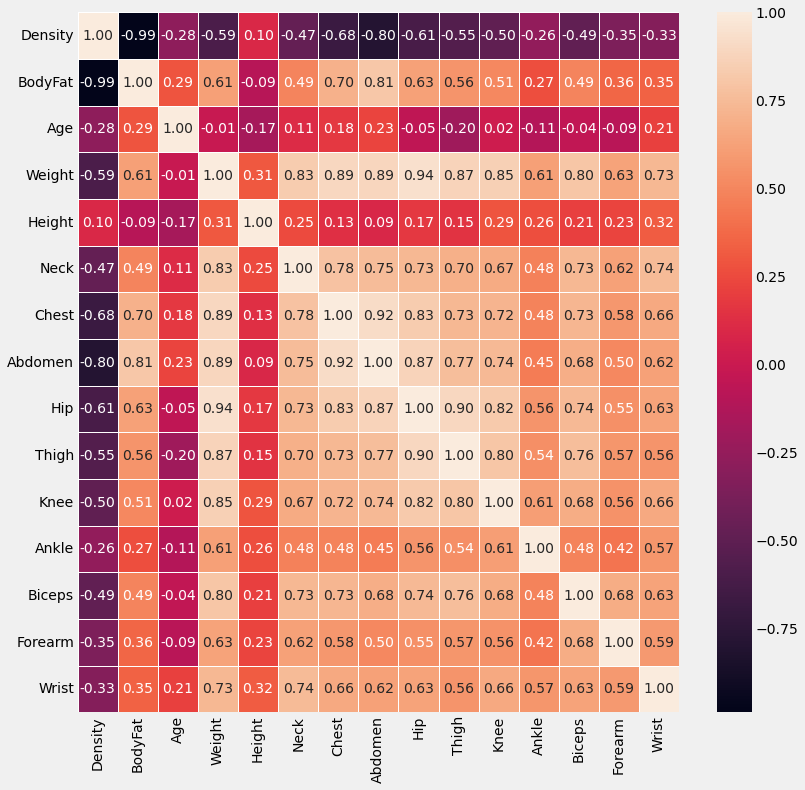

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

### Observations
> Multicollinearity is present in the data

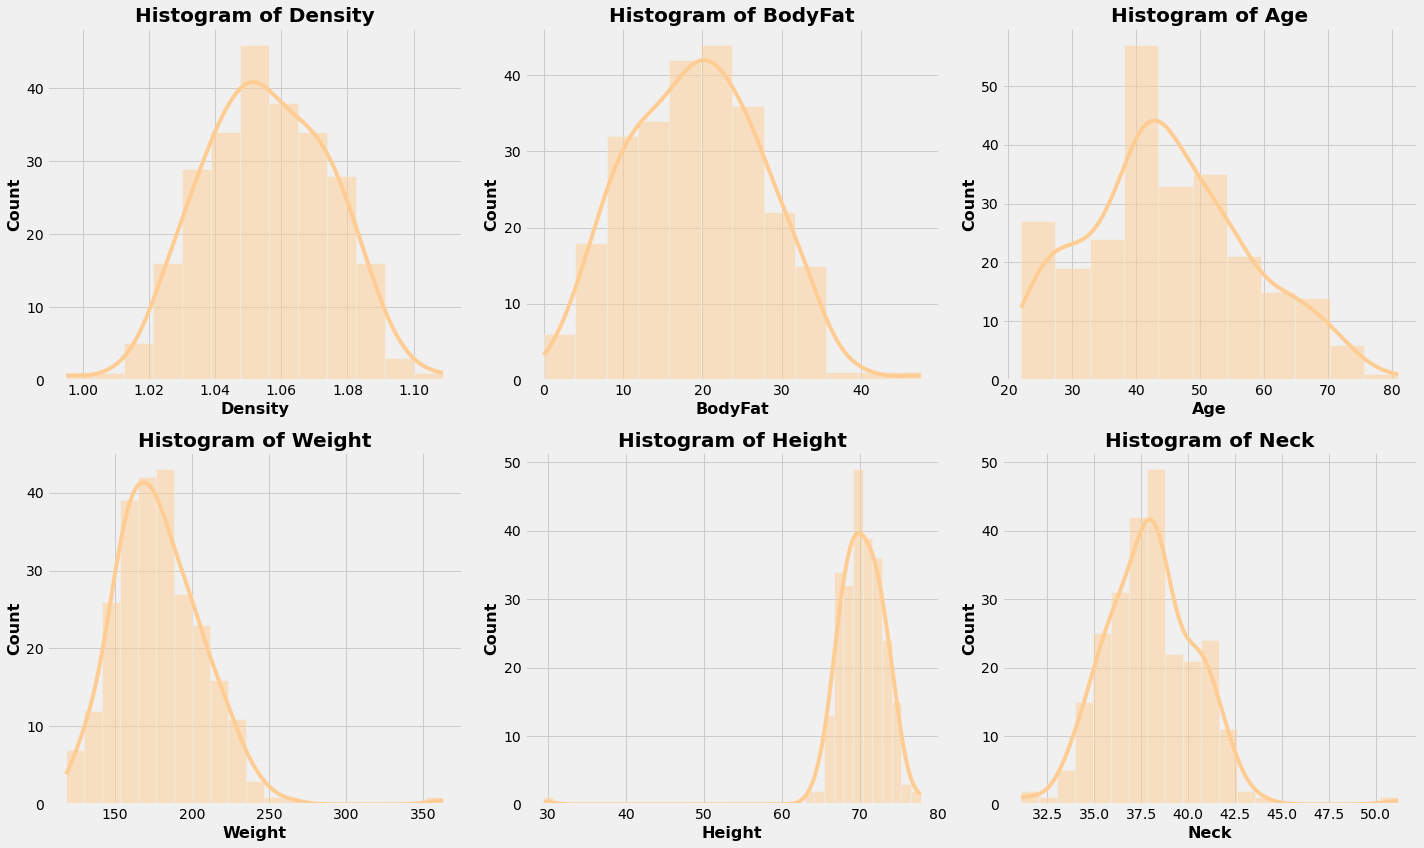

In [44]:
def plot_top6_histograms(data):
    """
    Plot histograms of the top 6 features in the DataFrame.

    Parameters:
    - data (DataFrame): Input DataFrame containing features.
    """
    # Select the top 5 features based on their numerical values
    top6_features = data.select_dtypes(include=['int64', 'float64']).columns[:6]
    
    # Create subplots for each feature
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    
    # Plot histograms for each feature
    for i, feature in enumerate(top6_features):
        row = i // 3
        col = i % 3
        sns.histplot(data=data, x=feature, ax=axes[row, col], kde=True)
        axes[row, col].set_title(f'Histogram of {feature}', fontsize=20, fontweight='bold')
        axes[row, col].set_xlabel(feature, fontsize=16, fontweight='bold')
        axes[row, col].set_ylabel('Count', fontsize=16, fontweight='bold')
        axes[row, col].tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_top6_histograms(df)

In [47]:
from tabulate import tabulate
def calculate_statistical_moments(data):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(df)


Statistical Moments:

+---------+---------+----------+----------------------+------------+------------+
|         |  Mean   |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+=========+=========+==========+======================+============+============+
| Density | 1.05557 |  1.0549  |      0.0190314       | -0.0201757 | -0.309619  |
+---------+---------+----------+----------------------+------------+------------+
| BodyFat | 19.1508 |   19.2   |       8.36874        |  0.146353  | -0.333811  |
+---------+---------+----------+----------------------+------------+------------+
|   Age   | 44.8849 |    43    |        12.602        |  0.283521  | -0.416441  |
+---------+---------+----------+----------------------+------------+------------+
| Weight  | 178.924 |  176.5   |       29.3892        |  1.20526   |  5.26951   |
+---------+---------+----------+----------------------+------------+------------+
| Height  | 70.1488 |    70    |       3.66286        |  -5.38499  |  59.54

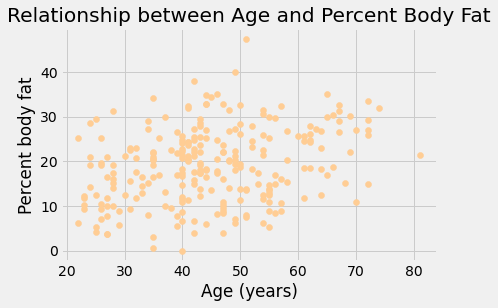

In [50]:
plt.scatter(df['Age'], df['BodyFat'])
plt.xlabel('Age (years)')
plt.ylabel('Percent body fat')
plt.title('Relationship between Age and Percent Body Fat')
plt.show()


In [54]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['Density']

# Data Preprocessing

In [55]:
X['Bmi']=703*X['Weight']/(X['Height']*X['Height'])
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [56]:
X['ACratio'] = X['Abdomen']/X['Chest']
X['HTratio'] = X['Hip']/X['Thigh']
X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342


**Now we are removing outliers**

In [57]:
z = np.abs(stats.zscore(X))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]
#find how many rows are left in the dataframe 
X_clean.shape

(242, 10)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

In [59]:
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

# Model Building


In [60]:
from sklearn.model_selection import GridSearchCV

def train_and_predict(X_train, y_train, X_test, y_test):
    # Define the model
    model = LinearRegression()
    
    # Define hyperparameters to tune
    params = {'fit_intercept': [True, False], 'normalize': [True, False]}
    
    # Perform Grid Search Cross Validation
    grid_search = GridSearchCV(model, param_grid=params, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Train the best model
    best_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    
    return r2, y_pred

# Example usage:
r2, y_pred = train_and_predict(X_train, y_train, X_test, y_test)
print(f"R2 Score: {r2:.4f}")


R2 Score: 0.7385


Text(0.5, 1.0, 'Actual Vs Predicted')

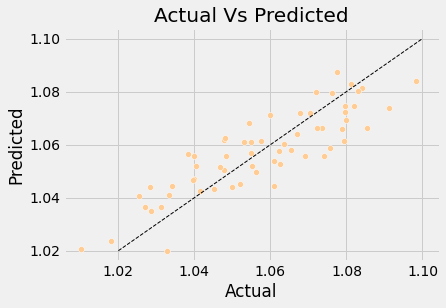

In [61]:
sns.scatterplot(y_test,y_pred)
plt.plot([1.02, 1.10], [1.02, 1.10], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")

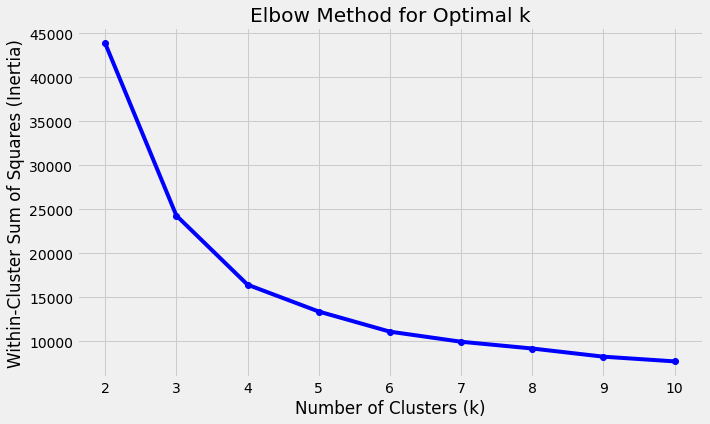

In [66]:
# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

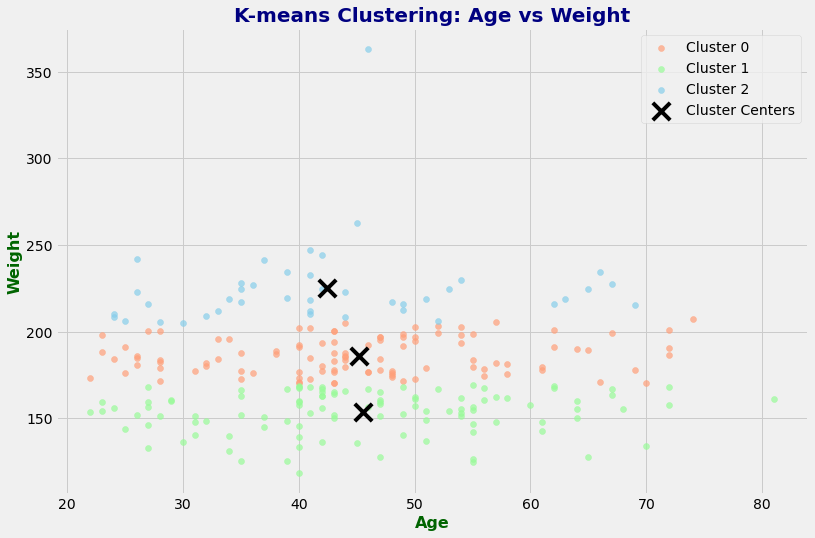

In [68]:
def plot_clusters(df):
    """
    Perform K-means clustering on the top 2 features and plot the clusters.

    Parameters:
    - df (DataFrame): Input DataFrame containing features.
    """
    # Choose the top 2 features for clustering
    features = ['Age', 'Weight']
    
    # Perform K-means clustering
    km = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
    df['cluster'] = km.fit_predict(df[features])  # Fit K-means and assign cluster labels

    # Set custom colors for clusters
    colors = ['#FFA07A', '#98FB98', '#87CEEB']

    # Plot clusters with cluster centers
    plt.figure(figsize=(12, 8))

    # Plot each cluster using a different color
    for cluster_label, color in zip(sorted(df['cluster'].unique()), colors):
        cluster_data = df[df['cluster'] == cluster_label]
        plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {cluster_label}', alpha=0.7, color=color)

    # Plot cluster centers
    cluster_centers = km.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')

    # Set plot title and labels
    plt.title(f'K-means Clustering: {features[0]} vs {features[1]}', fontsize=20, fontweight='bold', color='navy')
    plt.xlabel(features[0], fontsize=16, fontweight='bold', color='darkgreen')
    plt.ylabel(features[1], fontsize=16, fontweight='bold', color='darkgreen')

    # Add legend
    plt.legend(fontsize=14)
    plt.grid(True)

    plt.show()

# Example usage:
plot_clusters(df)